# Desarrollo

## Actividad 1

## Preguntas:
* [a](#a)
* [b](#b)
* [c](#c)
* [d](#d)
* [e](#e)
* [f](#f)
* [g](#g)
* [h](#h)
* [i](#i)
* [j](#j)
* [k](#k)
* [l](#l)
* [m](#m)
* [n](#n)
* [o](#o)
* [p](#p)
* [q](#p)
* [r](#p)
* [s](#s)
* [t](#t)
* [u](#u)
* [v](#v)
* [Actividad 2](#Actividad2)

In [1]:
import pandas as pd
ftr = open("train_data.csv", "r",  encoding="ISO-8859-1")
rows = [line.split(" ",1) for line in ftr.readlines()]
df_train = pd.DataFrame(rows, columns=['Sentiment','Text'])
df_train['Sentiment'] = (pd.to_numeric(df_train['Sentiment'])+1)/2 # 0 o 1

fts = open("test_data.csv", "r",  encoding="ISO-8859-1")
rows = [line.split(" ",1) for line in fts.readlines()]
df_test = pd.DataFrame(rows, columns=['Sentiment','Text'])
df_test['Sentiment'] = (pd.to_numeric(df_test['Sentiment'])+1)/2 # 0 o 1

df_train_text = df_train.Text
df_test_text = df_test.Text
labels_train = df_train.Sentiment.values
labels_test = df_test.Sentiment.values

a)<a class="anchor" id="a"></a>

In [2]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3554 entries, 0 to 3553
Data columns (total 2 columns):
Sentiment    3554 non-null float64
Text         3554 non-null object
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


In [3]:
df_train.head()

,Sentiment,Text
0,0.0,"everything's serious , poetic , earnest and --..."
1,0.0,"narratively , trouble every day is a plodding ..."
2,1.0,a truly wonderful tale combined with stunning ...
3,1.0,jason patric and ray liotta make for one splen...
4,0.0,haneke keeps us at arm's length . guided more ...


In [4]:
suma = 0
i = 0
for sentence in df_train['Text']:
    if i == 0:
        minimo = len(sentence)
        maximo = len(sentence)
    else:
        if minimo>len(sentence):
            minimo = len(sentence)
            min_sent = sentence
        if maximo<len(sentence):
            maximo = len(sentence)
            max_sent = sentence
    i+=1
    suma += len(sentence)
avg_len = suma/len(df_train['Text'])

In [5]:
(avg_len, minimo, maximo, min_sent)

(114.70709060213844, 7, 267, 'crummy\n')

In [6]:
df_test.head()

,Sentiment,Text
0,0.0,screenwriter dan schneider and director shawn ...
1,0.0,"home alone goes hollywood , a funny premise un..."
2,1.0,seldom has a movie so closely matched the spir...
3,0.0,"less dizzying than just dizzy , the jaunt is p..."
4,0.0,an ultra-low-budget indie debut that smacks mo...


In [7]:
suma = 0
i = 0
for sentence in df_test['Text']:
    if i == 0:
        minimo = len(sentence)
        maximo = len(sentence)
    else:
        if minimo>len(sentence):
            minimo = len(sentence)
            min_sent = sentence
        if maximo<len(sentence):
            maximo = len(sentence)
            max_sent = sentence
    i+=1
    suma += len(sentence)
avg_len = suma/len(df_train['Text'])

In [8]:
(avg_len, minimo, maximo, min_sent)

(116.4679234665166, 9, 268, 'horrible\n')

Para un mejor analisis preliminar seria de utilidad la eliminacion de las stopwords a la hora de poder determinar los largos maximo, minimo y el promedio del dataset

b)<a class="anchor" id="b"></a>

In [9]:
from sklearn.model_selection import train_test_split
df_train_text, df_val_text, labels_train, labels_val  = train_test_split(df_train, labels_train, test_size=0.2, random_state=0)

In [10]:
df_train_text.shape

(2843, 2)

In [11]:
df_val_text.shape

(711, 2)

c)<a class="anchor" id="c"></a>

In [12]:
import re, time
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer, word_tokenize
def base_word(word):
    wordlemmatizer = WordNetLemmatizer()
    return wordlemmatizer.lemmatize(word) 
def word_extractor(text):
    commonwords = stopwords.words('english')
    text = re.sub(r'([a-z])\1+', r'\1\1',text) #substitute multiple letter by two
    words = ""
    wordtokens = [ base_word(word.lower()) for word in word_tokenize(text) ]
    for word in wordtokens:
        if word not in commonwords: #delete stopwords
            words+=" "+word
    return words
... #try yourself
word_extractor("I love to eat cake")
word_extractor("I love eating cake")
word_extractor("I loved eating the cake")
word_extractor("I do not love eating cake")
word_extractor("I don't love eating cake")
... #try yourself
texts_train = [word_extractor(text[1]) for text in df_train_text.to_numpy()]
texts_val = [word_extractor(text[1]) for text in df_val_text.to_numpy()]
texts_test = [word_extractor(text[1]) for text in df_test.to_numpy()]

La importancia del preprocesamiento en el dominio del lenguaje natural radica en disminuir las palabras que si bien aparecen con mas frecuencia son las menos significantes para realizar analisis (las stopwords) para asi reducir ruido y tiempo de ejecucion. Tambien es importante el proceso de reducir las palabras a su origen con stemming o lematizacion para evitar analizar palabras cuya semantica es identica pero estan escritas diferentes producto de una conjugacion. En este caso se utiliza lematizacion ya que presenta mejores resultados que stemming al realizar el proceso considerando el contexto en el cual se encuentra la palabra.

d)<a class="anchor" id="d"></a>

In [13]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1, 1), binary=False) #TF representation
vectorizer.fit(texts_train)
features_train = vectorizer.transform(texts_train)
... #transform val and test


vectorizer2 = CountVectorizer(ngram_range=(1, 1), binary=False)
vectorizer2.fit(texts_val)
features_val = vectorizer.transform(texts_val)

vectorizer3 = CountVectorizer(ngram_range=(1, 1), binary=False)
vectorizer3.fit(texts_test)
features_test = vectorizer.transform(texts_test)

vocab = vectorizer.get_feature_names()
dist=list(np.array(features_train.sum(axis=0)).reshape(-1,))

vocab2 = vectorizer.get_feature_names()
dist2=list(np.array(features_val.sum(axis=0)).reshape(-1,))

vocab3 = vectorizer.get_feature_names()
dist3=list(np.array(features_test.sum(axis=0)).reshape(-1,))

e)<a class="anchor" id="e"></a>

In [14]:
sentiment = []
for s in labels_train:
    if s == 1:
        sentiment.append("Positivo")
    else:
        sentiment.append("Negativo")

In [15]:
from sklearn.decomposition import TruncatedSVD #aka LSA
import matplotlib.pyplot as plt
model = TruncatedSVD(n_components=2)
model.fit(features_train)
x_plot = model.transform(features_train)
plt.figure(figsize=(10,5))
plt.scatter(x_plot[:,0], x_plot[:,1], c=labels_train)
plt.show()

<Figure size 1000x500 with 1 Axes>

In [16]:
np.where(x_plot == x_plot.max())

(array([1786], dtype=int64), array([0], dtype=int64))

In [17]:
x_plot[1786]

array([1.95014682, 1.75249148])

In [18]:
sentiment[1786]

'Positivo'

Amarillo Positivo, Morado Negativo

Las agrupaciones que se forman parecen contener una cantidad equitativa de positivo y negativo. Estas agrupaciones corresponden a las tematicas de las distintas criticas, pudiendo ser que cada agrupacion sea una pelicula distinta o que hablen sobre caracteristicas de las peliculas como la musica, los actores, etc.

f)<a class="anchor" id="f"></a>

In [19]:
from sklearn.linear_model import LogisticRegression
from ipywidgets import interact, interactive, fixed, interact_manual

from sklearn.metrics import confusion_matrix
import seaborn as sn
%matplotlib inline

def do_LOGIT(x,y,xv,yv, param):
    print("Param C= ",param)
    model= LogisticRegression(penalty = 'l2')
    model.set_params(C=param)
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc
#Cs = [10**i for i in np.arange(-4,4)]
Cs = np.power(np.repeat(10., 8),np.arange(-4,4))
def interact_doLOGIT(Css):
    model, train_acc, test_acc = do_LOGIT(features_train,labels_train,features_val,labels_val, param= Css )
    print("train acc: ",train_acc)
    print("val acc: ",test_acc)
    
    #Train
    lista_train = model.predict(features_train)
    #
    y_true_train = list(map(str,lista_train))
    y_pred_train = list(map(str,labels_train))
    data = confusion_matrix(y_true_train, y_pred_train)
    df_cm = pd.DataFrame(data, columns=np.unique(y_true_train), index = np.unique(y_true_train))
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted Train'
    plt.figure(figsize = (10,7))
    sn.set(font_scale=1.2)#for label size
    sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 14})# font size
    
    #Val
    lista_val = model.predict(features_val)
    #
    y_true_val = list(map(str,lista_val))
    y_pred_val = list(map(str,labels_val))
    data = confusion_matrix(y_true_val, y_pred_val)
    df_cm = pd.DataFrame(data, columns=np.unique(y_true_val), index = np.unique(y_true_val))
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted Val'
    plt.figure(figsize = (10,7))
    sn.set(font_scale=1.2)#for label size
    sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 14})# font size
    
interact(interact_doLOGIT, Css=Cs)

    

interactive(children=(Dropdown(description='Css', options=(0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0)…

<function __main__.interact_doLOGIT(Css)>

Conclusiones de lo que se observa de los heatmaps

g)<a class="anchor" id="g"></a>

In [20]:
from sklearn.svm import SVC as SVM #SVC is for classification
def do_SVM(x,y,xv,yv, param, kernel='linear'):
    C = param
    print("Param C= ",C, 'Kernel= ', kernel)
    model= SVM()
    model.set_params(C=C,kernel=kernel) #try rbf and linear at least
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc
Cs = np.power(np.repeat(10., 8),np.arange(-4,4))

def interact_doSVM(Css, kernels):
    model, train_acc, test_acc = do_SVM(features_train, labels_train, features_val, labels_val, param= Css, kernel=kernels)
    print("train acc: ",train_acc)
    print("val acc: ",test_acc)
    
    #Train
    lista_train = model.predict(features_train)
    #
    y_true_train = list(map(str,lista_train))
    y_pred_train = list(map(str,labels_train))
    data = confusion_matrix(y_true_train, y_pred_train)
    df_cm = pd.DataFrame(data, columns=np.unique(y_true_train), index = np.unique(y_true_train))
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted Train'
    plt.figure(figsize = (10,7))
    sn.set(font_scale=1.2)#for label size
    sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 14})# font size
    
    #Val
    lista_val = model.predict(features_val)
    #
    y_true_val = list(map(str,lista_val))
    y_pred_val = list(map(str,labels_val))
    data = confusion_matrix(y_true_val, y_pred_val)
    df_cm = pd.DataFrame(data, columns=np.unique(y_true_val), index = np.unique(y_true_val))
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted Val'
    plt.figure(figsize = (10,7))
    sn.set(font_scale=1.2)#for label size
    sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 14})# font size

interact(interact_doSVM, Css=Cs, kernels = ['linear', 'rbf'])


interactive(children=(Dropdown(description='Css', options=(0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0)…

<function __main__.interact_doSVM(Css, kernels)>

Con parametro de regularizacion C menor a 0.01 con kernel lineal, la SVM predice que todos los comentarios son negativos. Asi mismo ocurre con al utilizar el kernel rbf solo que para este caso el valor de C no puede ser menor a 10, pero aun con este valor, el accuracy de la SVM solo llega a ser del 50% por lo que es recomendable utilizar un valor mayor. Para el caso del kernel lineal con C igual a 0.01 se obtienen mejores resultados que rbf con 10, pero aun asi mejorables. Al aumentar el valor de C el accuracy para el training set mejora llegando a ser igual a 1 para valores de C > 1 pero para el caso de test set el valor llega a su maximo (69.2%) para C = 0.1 y con valores mayores va descendiendo hasta 68.7%

h)<a class="anchor" id="h"></a>

([<matplotlib.axis.XTick at 0x21fe877ec18>,
 <a list of 29 Text xticklabel objects>)

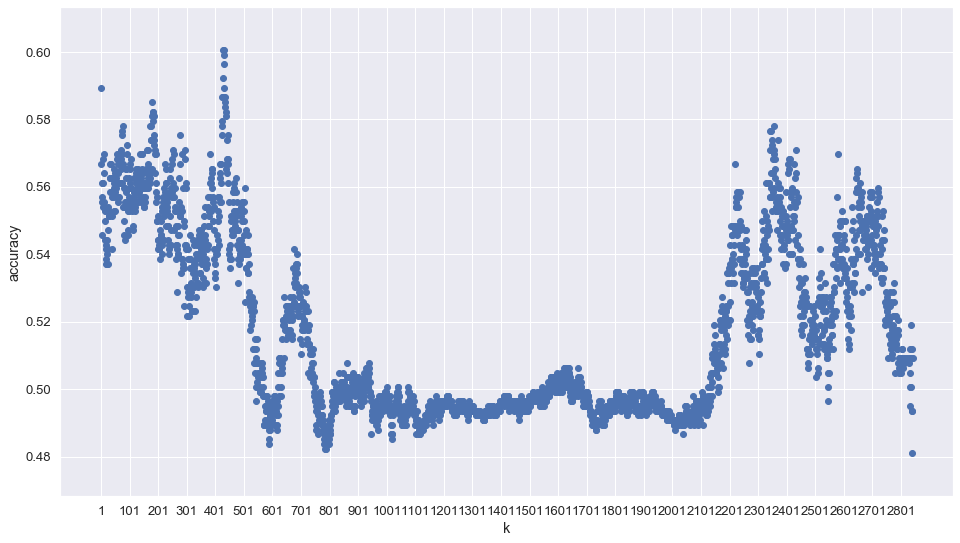

In [22]:
from sklearn.neighbors import KNeighborsClassifier
k_range = range(1, features_train.shape[0])
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(features_train, labels_train)
    scores.append(knn.score(features_val, labels_val))
plt.figure(figsize = (16,9))
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks(np.arange(1, features_train.shape[0], 100)  )

In [23]:
scores.index(max(scores))

427

In [24]:
from sklearn.neighbors import KNeighborsClassifier
def do_KNN(x,y,xv,yv, param):
    model = KNeighborsClassifier()
    print("Param K= ",param)
    model.set_params(n_neighbors=param)
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc

def interact_doKNN(Kss):
    model, train_acc, test_acc = do_KNN(features_train, labels_train, features_val, labels_val, param= Kss)
    print("train acc: ",train_acc)
    print("val acc: ",test_acc)
    
    #Train
    lista_train = model.predict(features_train)
    #
    y_true_train = list(map(str,lista_train))
    y_pred_train = list(map(str,labels_train))
    data = confusion_matrix(y_true_train, y_pred_train)
    df_cm = pd.DataFrame(data, columns=np.unique(y_true_train), index = np.unique(y_true_train))
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted Train'
    plt.figure(figsize = (10,7))
    sn.set(font_scale=1.2)#for label size
    sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 14})# font size
    
    #Val
    lista_val = model.predict(features_val)
    #
    y_true_val = list(map(str,lista_val))
    y_pred_val = list(map(str,labels_val))
    data = confusion_matrix(y_true_val, y_pred_val)
    df_cm = pd.DataFrame(data, columns=np.unique(y_true_val), index = np.unique(y_true_val))
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted Val'
    plt.figure(figsize = (10,7))
    sn.set(font_scale=1.2)#for label size
    sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 14})#

Ks = np.arange(1, features_train.shape[0], 10)    
interact(interact_doKNN, Kss=(1, features_train.shape[0], 1))
    

interactive(children=(IntSlider(value=1422, description='Kss', max=2843, min=1), Output()), _dom_classes=('wid…

<function __main__.interact_doKNN(Kss)>

Del valor de k-neighbors utilizados es posible decir que para determinar el sentimiento de una review se necesitan un quinto de los datos que presenten menor disancia (probablemente cosenoidal debido a la dimensionalidad) respecto a la review que se desea predecir.

i)<a class="anchor" id="i"></a>

In [26]:
from sklearn.tree import DecisionTreeClassifier as Tree
def do_Tree(x,y,xv,yv, param_d=None, param_m=2):
    model= Tree()
    print("Param Max-D= ",param_d, 'Min-samples-S= ', param_m)
    model.set_params(max_depth=param_d, min_samples_split=param_m) 
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc

def interact_doTree(Depth, Samples):
    model, train_acc, test_acc = do_Tree(features_train, labels_train, features_val, labels_val, param_d = Depth ,param_m = Samples)
    print("train acc: ",train_acc)
    print("val acc: ",test_acc)
    
    #Train
    lista_train = model.predict(features_train)
    #
    y_true_train = list(map(str,lista_train))
    y_pred_train = list(map(str,labels_train))
    data = confusion_matrix(y_true_train, y_pred_train)
    df_cm = pd.DataFrame(data, columns=np.unique(y_true_train), index = np.unique(y_true_train))
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted Train'
    plt.figure(figsize = (10,7))
    sn.set(font_scale=1.2)#for label size
    sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 14})# font size
    
    #Val
    lista_val = model.predict(features_val)
    #
    y_true_val = list(map(str,lista_val))
    y_pred_val = list(map(str,labels_val))
    data = confusion_matrix(y_true_val, y_pred_val)
    df_cm = pd.DataFrame(data, columns=np.unique(y_true_val), index = np.unique(y_true_val))
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted Val'
    plt.figure(figsize = (10,7))
    sn.set(font_scale=1.2)#for label size
    sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 14})#

Depths = np.arange(1, features_train.shape[1], 500 ) #choose steps
SamplesS = np.arange(2, features_train.shape[0] , 500 ) #choose steps
interact(interact_doTree, Depth = Depths, Samples = SamplesS )

interactive(children=(Dropdown(description='Depth', options=(1, 501, 1001, 1501, 2001, 2501, 3001, 3501, 4001,…

<function __main__.interact_doTree(Depth, Samples)>

Se puede apreciar que al realizar variaciones a la variable Samples el accuracy del arbol disminuye, esto puede ser debido a que al restringir la cantidad de muestras requeridas para seguir subdividiendo los nodos muchas quedan mal clasificadas. Para las opciones presentadas se obtuvo que con un Samples = 2 se obtenia el mejor resultado, pero puede ser que exista un mejor valor que se encuentre entre los valores que se presentan en el dropdown.

Por otro lado en la variable Depth, no se observa cambios significativos a la hora de aumentar la profundidad del arbol, aunque es importante destacar que al aumentar el valor se producia una disminucion de la accuracy, como lo fue para Depth = 5501 cuya accuracy era peor que para Depth = 501 en el validation set.

j)<a class="anchor" id="j"></a>

In [29]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
def do_ANN(x,y, xv,yv, param):
    print("Neuron hidden = ",param)
    model = Sequential()
    model.add(Dense(units=param, input_dim=x.shape[1], activation="sigmoid"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(optimizer=SGD(lr=0.1), loss="binary_crossentropy", metrics=["accuracy"])
    model.fit(x, y, epochs=25, batch_size=128, verbose=0)
    train_acc = model.evaluate(x,y, verbose=0)[1] #in position 0 is the loss
    test_acc = model.evaluate(xv,yv, verbose=0)[1]
    return model, train_acc, test_acc
N_h = [2**i for i in range(1,10)]

Using TensorFlow backend.
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "c:\users\chris\pyenviroments\machinelearning\lib\site-packages\tensorflow_core\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "c:\users\chris\pyenviroments\machinelearning\lib\site-packages\tensorflow_core\python\pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "c:\users\chris\pyenviroments\machinelearning\lib\site-packages\tensorflow_core\python\pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "C:\Program Files\Python36\lib\imp.py", line 242, in load_module
    return load_dynamic(name, filename, file)
  File "C:\Program Files\Python36\lib\imp.py", line 342, in load_dynamic
    return _load(spec)
ImportError: DLL load failed: Error en una rutina de inicialización de biblioteca de vínculos dinámicos (D

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "c:\users\chris\pyenviroments\machinelearning\lib\site-packages\tensorflow_core\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "c:\users\chris\pyenviroments\machinelearning\lib\site-packages\tensorflow_core\python\pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "c:\users\chris\pyenviroments\machinelearning\lib\site-packages\tensorflow_core\python\pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "C:\Program Files\Python36\lib\imp.py", line 242, in load_module
    return load_dynamic(name, filename, file)
  File "C:\Program Files\Python36\lib\imp.py", line 342, in load_dynamic
    return _load(spec)
ImportError: DLL load failed: Error en una rutina de inicialización de biblioteca de vínculos dinámicos (D

TypeError: must be str, not list